<a href="https://colab.research.google.com/github/jakeh46g/Classification-Tree-and-Random-Forest-Analysis/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import packages and functions
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cellphonechurn.csv')
data

,Customer,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3
1,2,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3
2,3,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6
3,4,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9
4,5,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2147,0,201,1,0,0.24,1,212.7,72,58.4,11.26,7.0
2147,2148,1,108,0,0,0.38,2,115.1,114,41.8,10.57,13.8
2148,2149,0,70,1,0,0.31,0,177.4,125,53.1,11.31,10.9
2149,2150,0,62,1,0,0.00,4,245.3,91,53.0,6.15,8.5


In [5]:
features = ['DayCalls', 'DayMins']
X = data[features]
y = data[['Churn']]

# Initialize the model
rfModel = RandomForestClassifier(max_depth=2, max_features='sqrt', random_state=99)

In [6]:
# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8675309)


In [7]:
# Fit the random forest model on the training data
rfModel.fit(X_train, y_train)

pd.DataFrame( data =
             {'feature': rfModel.feature_names_in_,
              'importance': rfModel.feature_importances_}
            ).sort_values('importance',
                          ascending = False)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,feature,importance
1,DayMins,0.795461
0,DayCalls,0.204539


In [8]:
# Predict on the testing data
y_pred = rfModel.predict(X_test)
y_pred_prob = rfModel.predict_proba(X_test)[:, 1]

In [9]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC Score: {auc_score:.2f}")


Confusion Matrix:
[[471  22]
 [125  28]]
AUC Score: 0.66


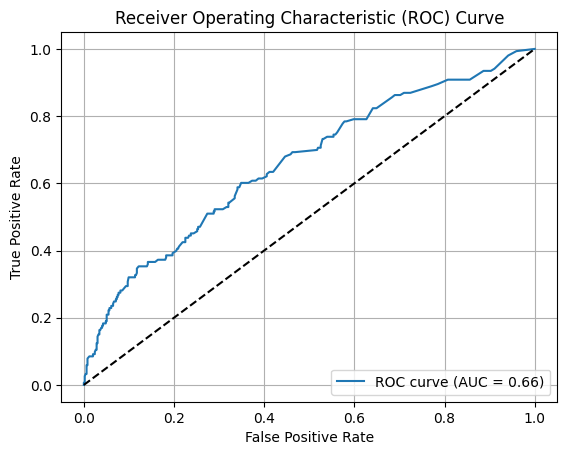

In [10]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

